In [2]:
attribute_lookup = {
    "Gender_Female": "Female",
    "Gender_Male": "Male",
    "Age": "Age(in years)",
    "Height": "Height (in meters)",
    "Weight": "Weight (in kilograms)",
    "FHOO": "History of being overweight in the family",
    "FAVC": "Frequent consumption of high-calorie foods",
    "FCVC": "Frequency of vegetable consumption",
    "NCP": "Number of main meals consumed per day",
    "CAEC_Always": "Consumption of food between meals: Always",
    "CAEC_Frequently": "Consumption of food between meals: Frequently",
    "CAEC_Sometimes": "Consumption of food between meals: Sometimes",
    "CAEC_no": "Consumption of food between meals: No",
    "SMOKE": "Smoking habit (yes/no)",
    "CH2O": "Daily water intake",
    "SCC": "Calories consumption monitoring (yes/no)",
    "FAF": "Physical activity frequency (hours per week)",
    "TUE": "Time spent using technological devices (hours per day)",
    "CALC_Always": "Consumption of alcohol: Always",
    "CALC_Frequently": "Consumption of alcohol: Frequently",
    "CALC_Sometimes": "Consumption of alcohol: Sometimes",
    "CALC_no": "Consumption of alcohol: No",
    "MTRANS_Automobile": "Mode of transportation: Automobile",
    "MTRANS_Bike": "Mode of transportation: Bike",
    "MTRANS_Motorbike": "Mode of transportation: Motorbike",
    "MTRANS_Public_Transportation": "Mode of transportation: Public_Transportation",
    "MTRANS_Walking": "Mode of transportation: Walking",
    "NObeyesdad": "Obesity level"
}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

filepath = '/content/drive/MyDrive/M4AI/ods.csv'
df = pd.read_csv(filepath)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df = df.rename(columns={'family_history_with_overweight': 'FHOO'})
df.head()

,Gender,Age,Height,Weight,FHOO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
# df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['FHOO'] = df['FHOO'].map({'no': False, 'yes': True})
df['FAVC'] = df['FAVC'].map({'no': False, 'yes': True})
# df['CAEC'] = df['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df['SMOKE'] = df['SMOKE'].map({'no': False, 'yes': True})
df['SCC'] = df['SCC'].map({'no': False, 'yes': True})
# df['CALC'] = df['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
# df['MTRANS'] = df['MTRANS'].map({'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Automobile': 4})
df['NObeyesdad'] = df['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6})

df.head()

,Gender,Age,Height,Weight,FHOO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,True,False,2.0,3.0,Sometimes,False,2.0,False,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,1.52,56.0,True,False,3.0,3.0,Sometimes,True,3.0,True,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,1.80,77.0,True,False,2.0,3.0,Sometimes,False,2.0,False,2.0,1.0,Frequently,Public_Transportation,1
3,Male,27.0,1.80,87.0,False,False,3.0,3.0,Sometimes,False,2.0,False,2.0,0.0,Frequently,Walking,2
4,Male,22.0,1.78,89.8,False,False,2.0,1.0,Sometimes,False,2.0,False,0.0,0.0,Sometimes,Public_Transportation,3


In [7]:
df = pd.get_dummies(df, columns=['Gender', 'CAEC', 'CALC', 'MTRANS'], drop_first=False)

df.head()

,Age,Height,Weight,FHOO,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,True,False,2.0,3.0,False,2.0,False,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,True,False,3.0,3.0,True,3.0,True,...,False,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,True,False,2.0,3.0,False,2.0,False,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,False,False,3.0,3.0,False,2.0,False,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,False,False,2.0,1.0,False,2.0,False,...,False,False,False,True,False,False,False,False,True,False


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.size'] = 14

In [9]:
df['BMI'] = df['Weight'] / (df['Height']**2)
df.head()

,Age,Height,Weight,FHOO,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI
0,21.0,1.62,64.0,True,False,2.0,3.0,False,2.0,False,...,False,False,False,True,False,False,False,True,False,24.386526
1,21.0,1.52,56.0,True,False,3.0,3.0,True,3.0,True,...,False,False,True,False,False,False,False,True,False,24.238227
2,23.0,1.80,77.0,True,False,2.0,3.0,False,2.0,False,...,False,True,False,False,False,False,False,True,False,23.765432
3,27.0,1.80,87.0,False,False,3.0,3.0,False,2.0,False,...,False,True,False,False,False,False,False,False,True,26.851852
4,22.0,1.78,89.8,False,False,2.0,1.0,False,2.0,False,...,False,False,True,False,False,False,False,True,False,28.342381


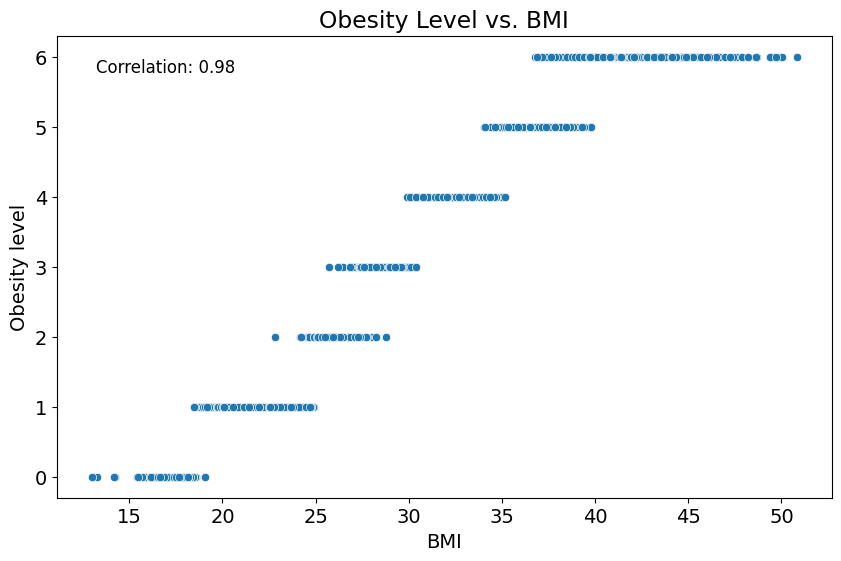

In [10]:
correlation = df['NObeyesdad'].corr(df['BMI'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='NObeyesdad')
plt.xlabel('BMI')
plt.ylabel(attribute_lookup['NObeyesdad'])
plt.title('Obesity Level vs. BMI')

# Add the correlation coefficient as text on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

In [11]:
df = df.drop(['Weight', 'Height', 'BMI'], axis=1)

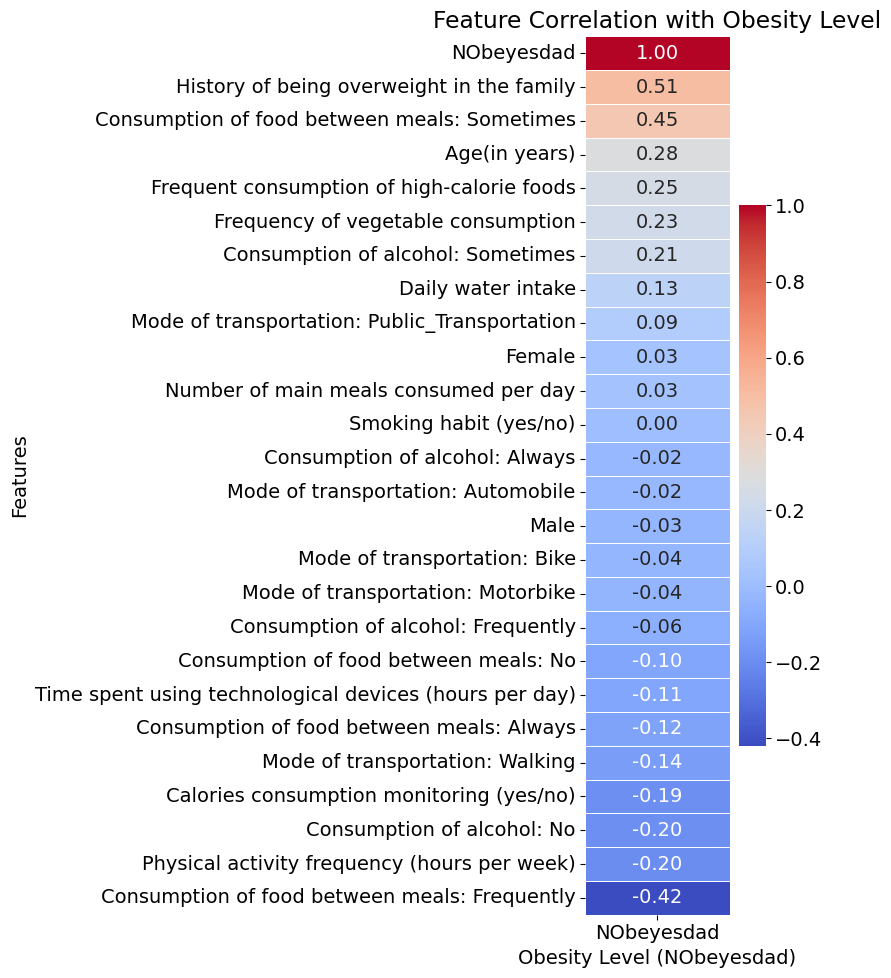

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix[['NObeyesdad']].sort_values(by='NObeyesdad', ascending=False)

index_to_rename = {idx: attribute_lookup[idx] for idx in correlation_with_target.index if idx in attribute_lookup and idx != 'NObeyesdad'}
correlation_with_target = correlation_with_target.rename(index=index_to_rename)

plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation with Obesity Level')
plt.ylabel('Features')
plt.xlabel('Obesity Level (NObeyesdad)')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

# Train

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Data splitting complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data splitting complete.
X_train shape: (1583, 25)
X_test shape: (528, 25)
y_train shape: (1583,)
y_test shape: (528,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.4f}')

print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))

print('\nLogistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.6250

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        68
           1       0.53      0.31      0.39        78
           2       0.56      0.46      0.51        71
           3       0.51      0.33      0.40        63
           4       0.59      0.60      0.59        94
           5       0.59      0.84      0.70        75
           6       0.91      0.99      0.95        79

    accuracy                           0.62       528
   macro avg       0.61      0.62      0.60       528
weighted avg       0.61      0.62      0.61       528


Logistic Regression Confusion Matrix:
[[55  4  5  0  3  1  0]
 [26 24 10  9  7  1  1]
 [ 6 11 33  2  7 12  0]
 [ 2  4  6 21 14 13  3]
 [ 5  2  5  6 56 16  4]
 [ 1  0  0  3  8 63  0]
 [ 1  0  0  0  0  0 78]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


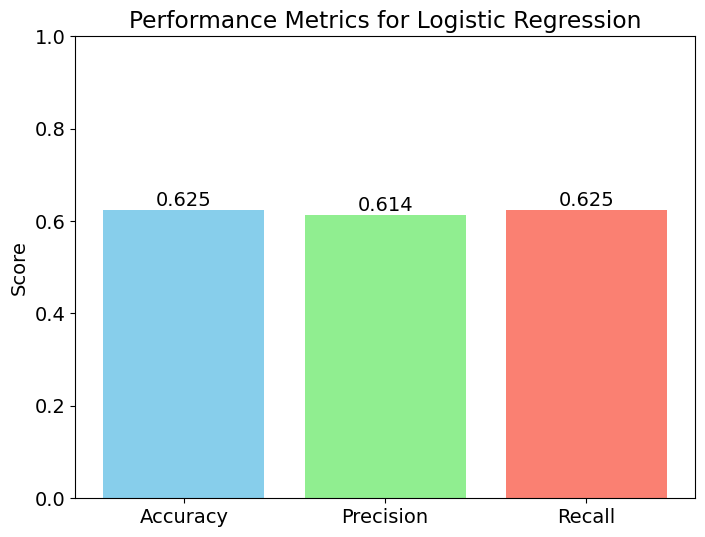

In [16]:

report = classification_report(y_test, y_pred_lr, output_dict=True)

precision_lr = report['weighted avg']['precision']
recall_lr = report['weighted avg']['recall']

metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy_lr, precision_lr, recall_lr]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Score')
plt.title('Performance Metrics for Logistic Regression')
plt.ylim(0, 1)

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')

plt.show()

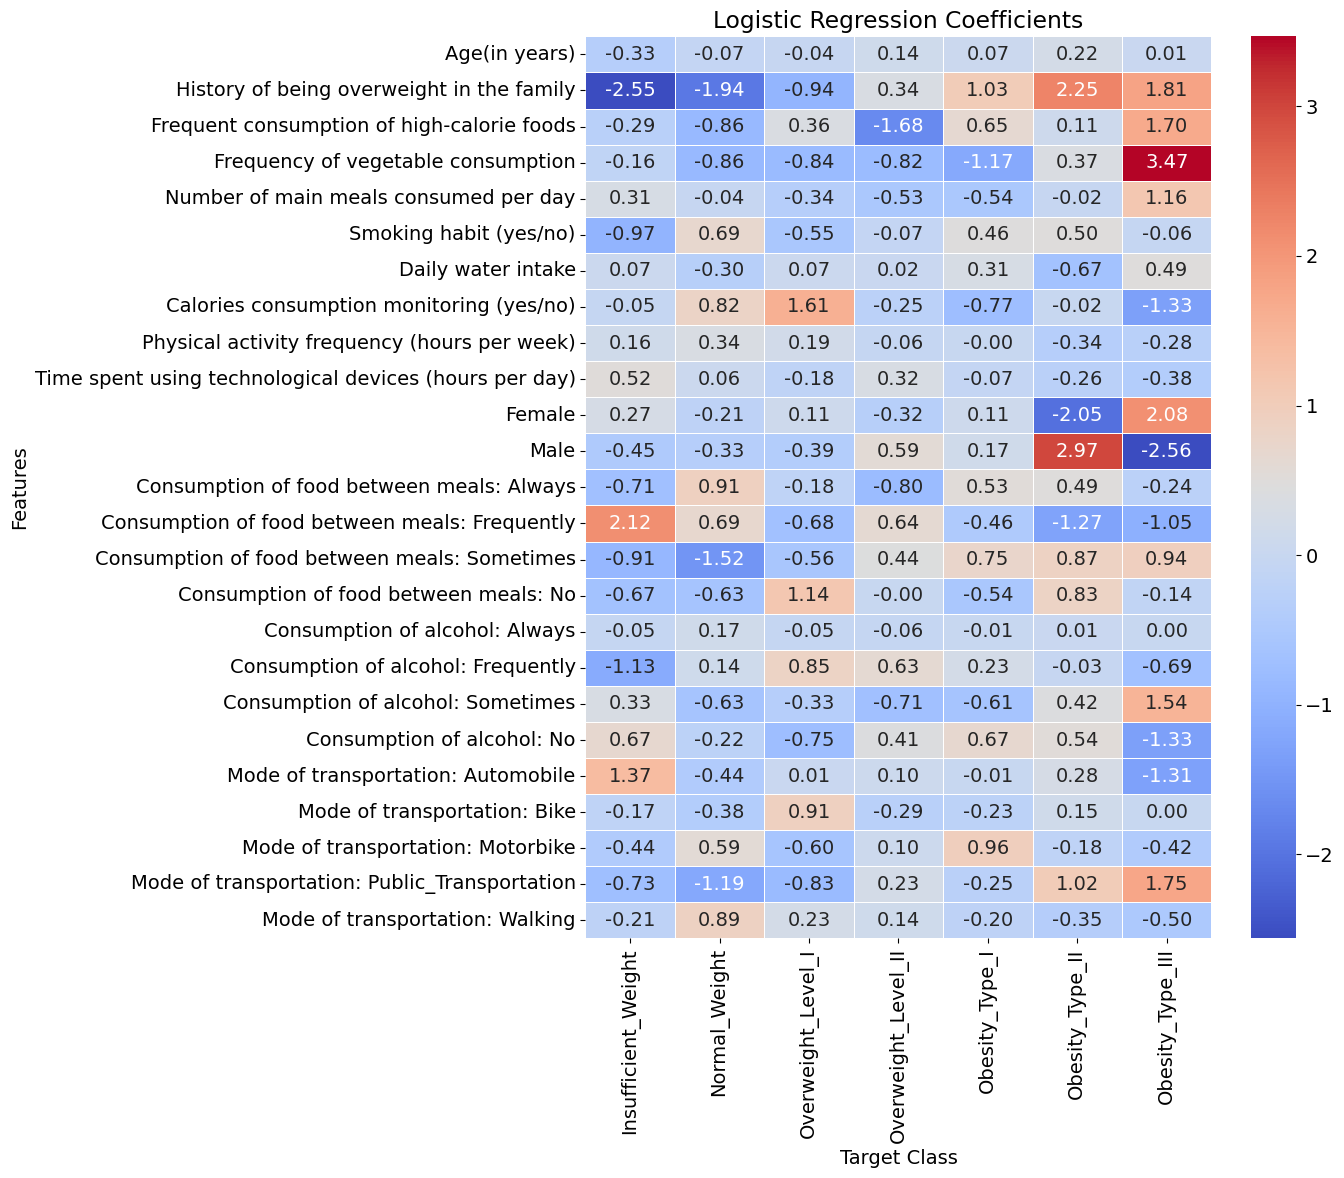

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class_names_map = {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'}
class_names = [class_names_map[i] for i in log_reg.classes_]


coefficients = pd.DataFrame(log_reg.coef_.T, index=X_train.columns, columns=class_names)

index_to_rename = {idx: attribute_lookup[idx] for idx in coefficients.index if idx in attribute_lookup}
coefficients = coefficients.rename(index=index_to_rename)

# print(coefficients)

plt.figure(figsize=(14, 12))
sns.heatmap(coefficients, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Logistic Regression Coefficients')
plt.ylabel('Features')
plt.xlabel('Target Class')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
plt.rcParams['font.size'] = 12

['Calories consumption monitoring (yes/no)'
 'Consumption of alcohol: Sometimes'
 'Consumption of food between meals: Frequently'
 'Consumption of food between meals: Sometimes' 'Female'
 'Frequency of vegetable consumption'
 'Frequent consumption of high-calorie foods'
 'History of being overweight in the family' 'Male'
 'Mode of transportation: Public_Transportation']


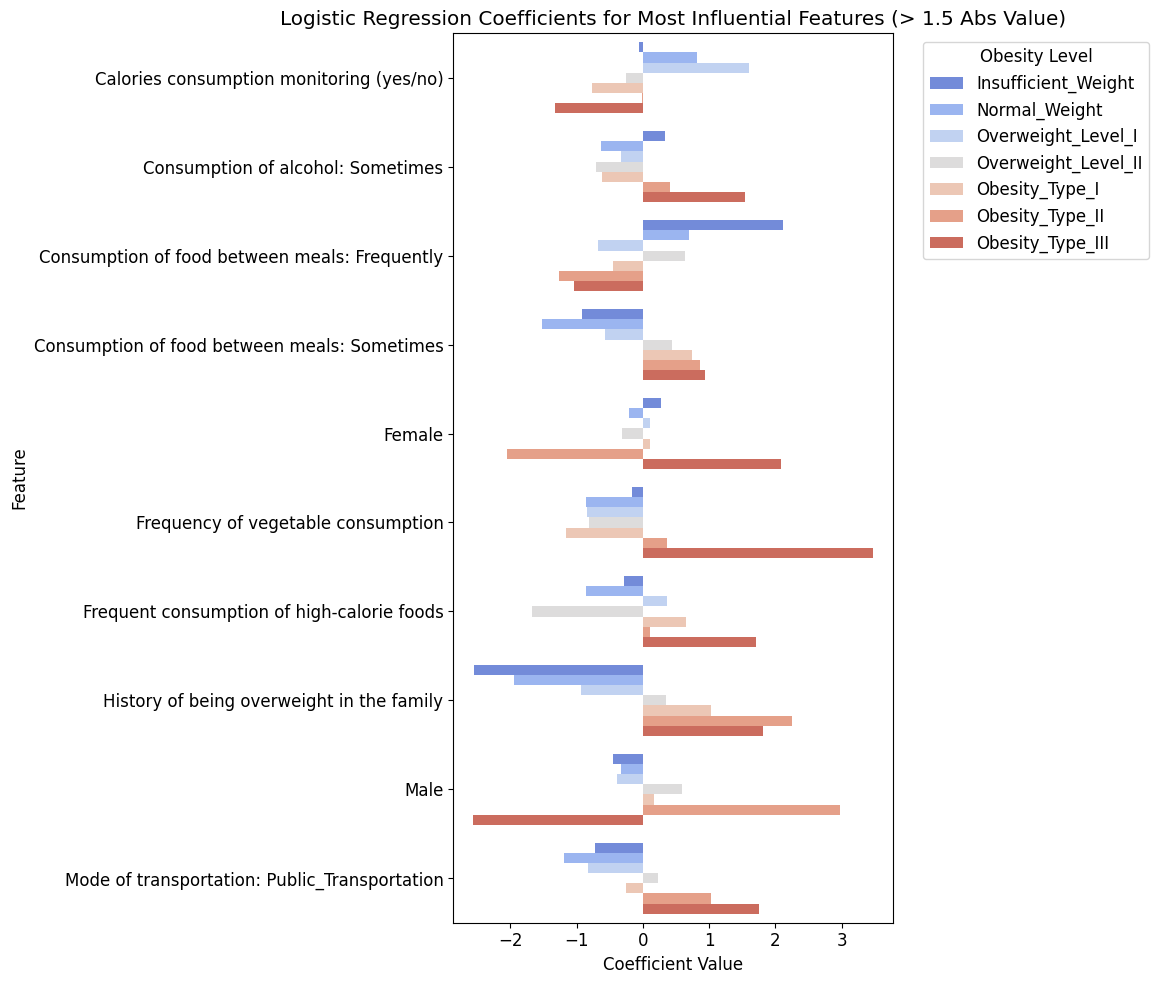

In [19]:
max_abs_coefficients = coefficients.abs().max(axis=1)

features_large_coef_names = max_abs_coefficients[max_abs_coefficients > 1.5].index

significant_coefficients_df = coefficients.loc[features_large_coef_names]

obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

significant_coefficients_flat = significant_coefficients_df.stack().reset_index()
significant_coefficients_flat.columns = ['Feature', 'Target Class', 'Coefficient']

significant_coefficients_flat['Target Class'] = pd.Categorical(significant_coefficients_flat['Target Class'], categories=obesity_order, ordered=True)
significant_coefficients_sorted = significant_coefficients_flat.sort_values(by=['Feature', 'Target Class'])
significant_coefficients_sorted['Correlation_Direction'] = significant_coefficients_sorted['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

print(significant_coefficients_sorted.Feature.unique())
plt.figure(figsize=(12, 10))
ax = sns.barplot(data=significant_coefficients_sorted, x='Coefficient', y='Feature', hue='Target Class', palette='coolwarm', dodge=True) # Use dodge=True for side-by-side bars
plt.title('Logistic Regression Coefficients for Most Influential Features (> 1.5 Abs Value)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

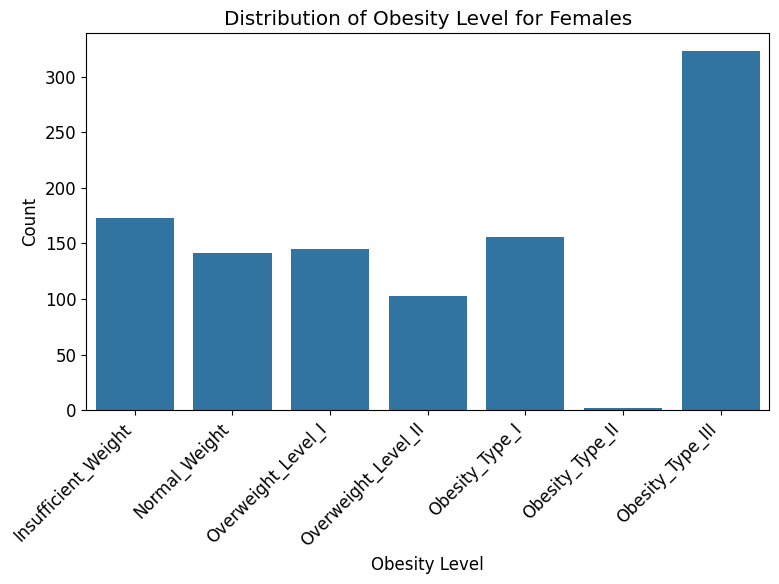

In [20]:
df_female = df[df['Gender_Female'] == 1]

plt.figure(figsize=(8, 6))
sns.countplot(data=df_female, x='NObeyesdad', order=sorted(df_female['NObeyesdad'].unique()))
plt.title('Distribution of Obesity Level for Females')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(ticks=sorted(df_female['NObeyesdad'].unique()), labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

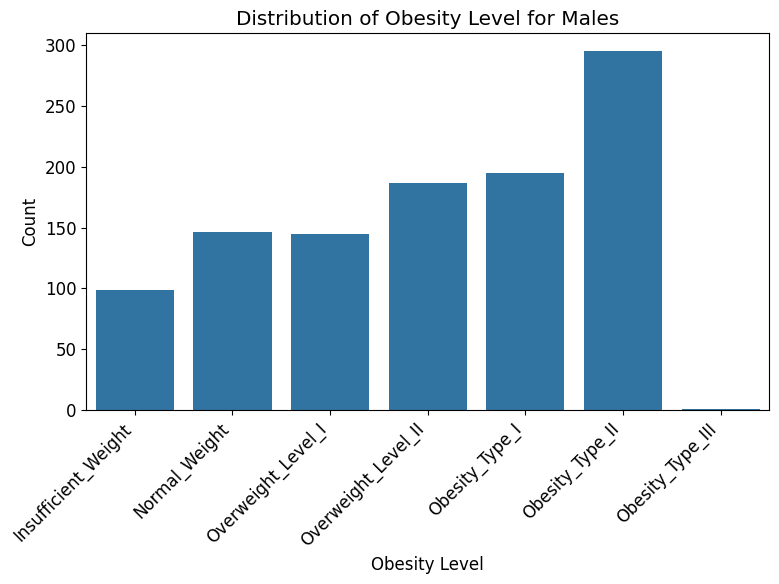

In [21]:
df_female = df[df['Gender_Male'] == 1]

plt.figure(figsize=(8, 6))
sns.countplot(data=df_female, x='NObeyesdad', order=sorted(df_female['NObeyesdad'].unique()))
plt.title('Distribution of Obesity Level for Males')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(ticks=sorted(df_female['NObeyesdad'].unique()), labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
plt.rcParams['font.size'] = 14

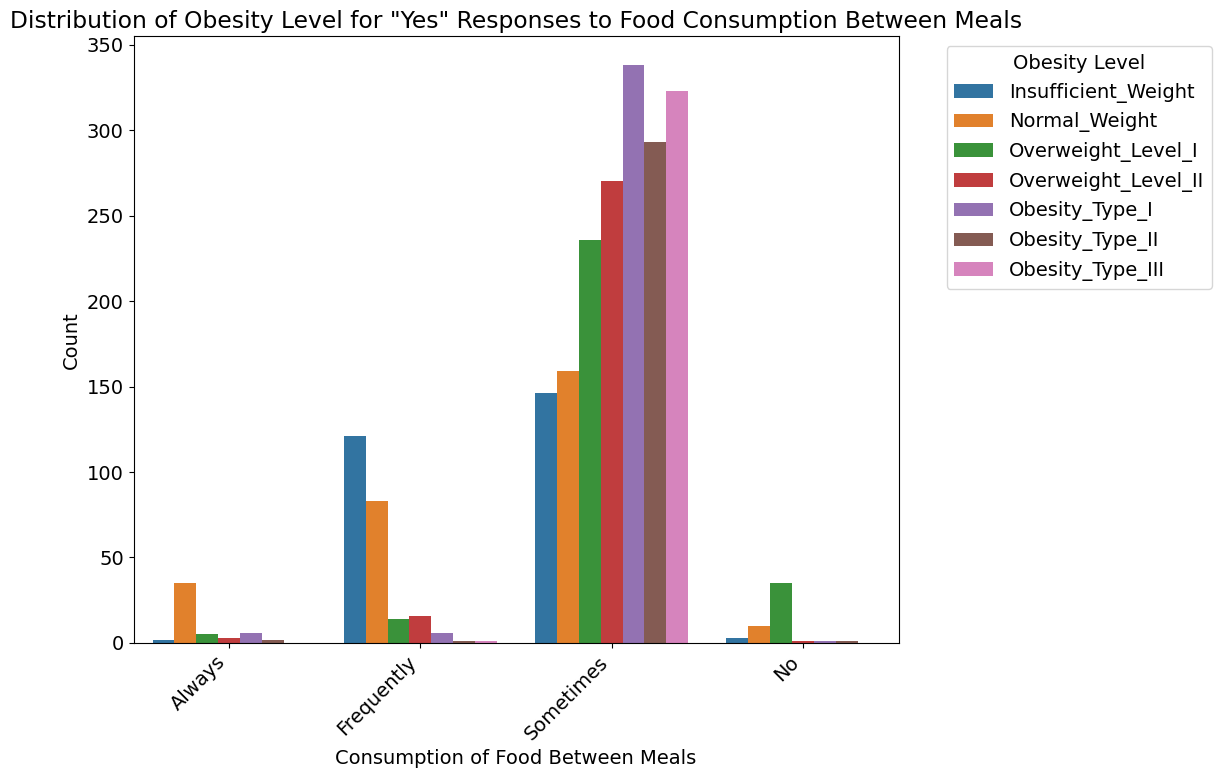

In [23]:
obesity_level_map = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}
df['Obesity_Level_Name'] = df['NObeyesdad'].map(obesity_level_map)
caec_columns = ['CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no']
caec_labels = ['Always', 'Frequently', 'Sometimes', 'No']

# Create a new DataFrame to hold the combined data for plotting
combined_caec_yes = pd.DataFrame()

for col, label in zip(caec_columns, caec_labels):
    df_yes = df[df[col] == 1].copy()

    # Add a column indicating the CAEC category
    df_yes['CAEC_Category'] = label

    # Append to the combined DataFrame
    combined_caec_yes = pd.concat([combined_caec_yes, df_yes], ignore_index=True)

# Plot the combined data
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_caec_yes, x='CAEC_Category', hue='Obesity_Level_Name',
              order=caec_labels, # Use the shorter labels for order
              hue_order=obesity_level_map.values())
plt.title('Distribution of Obesity Level for "Yes" Responses to Food Consumption Between Meals')
plt.xlabel('Consumption of Food Between Meals')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
plt.rcParams['font.size'] = 12

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary metrics

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')

print('\nDecision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt))

print('\nDecision Tree Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7083

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        68
           1       0.52      0.44      0.47        78
           2       0.58      0.55      0.57        71
           3       0.52      0.57      0.55        63
           4       0.72      0.67      0.69        94
           5       0.88      0.89      0.89        75
           6       1.00      0.99      0.99        79

    accuracy                           0.71       528
   macro avg       0.70      0.71      0.70       528
weighted avg       0.71      0.71      0.71       528


Decision Tree Confusion Matrix:
[[57  6  2  1  2  0  0]
 [11 34 10 11 11  1  0]
 [ 9 10 39  9  3  1  0]
 [ 4  6  6 36  9  2  0]
 [ 2  9  6  9 63  5  0]
 [ 0  1  4  3  0 67  0]
 [ 1  0  0  0  0  0 78]]


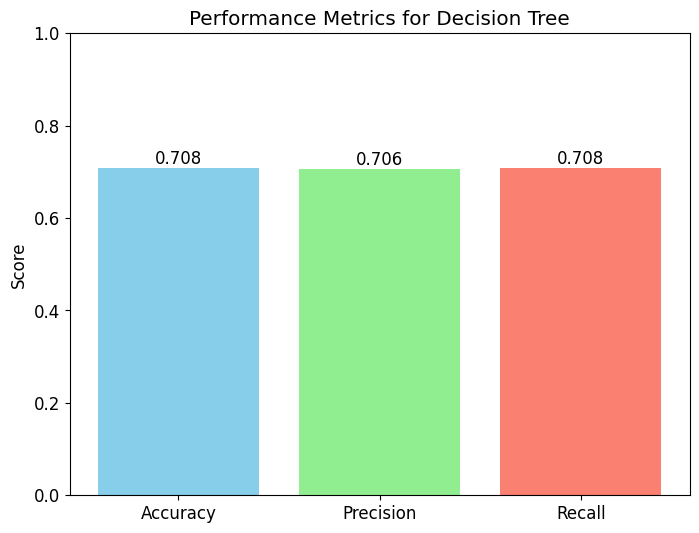

In [26]:
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

precision_dt = report_dt['weighted avg']['precision']
recall_dt = report_dt['weighted avg']['recall']

metrics_dt = ['Accuracy', 'Precision', 'Recall']
values_dt = [accuracy_dt, precision_dt, recall_dt]

plt.figure(figsize=(8, 6))
bars_dt = plt.bar(metrics_dt, values_dt, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Score')
plt.title('Performance Metrics for Decision Tree')
plt.ylim(0, 1)

for bar in bars_dt:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')

plt.show()

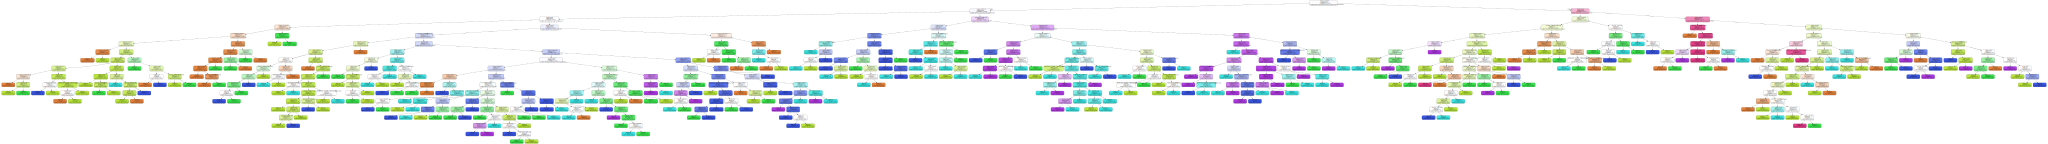

In [27]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the Decision Tree
dot_data = export_graphviz(decision_tree,
                           out_file=None,
                           feature_names=X_train.columns, # Use X_train.columns
                           # class_names=[str(c) for c in decision_tree.classes_], # Use string representation of class names
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)

graph

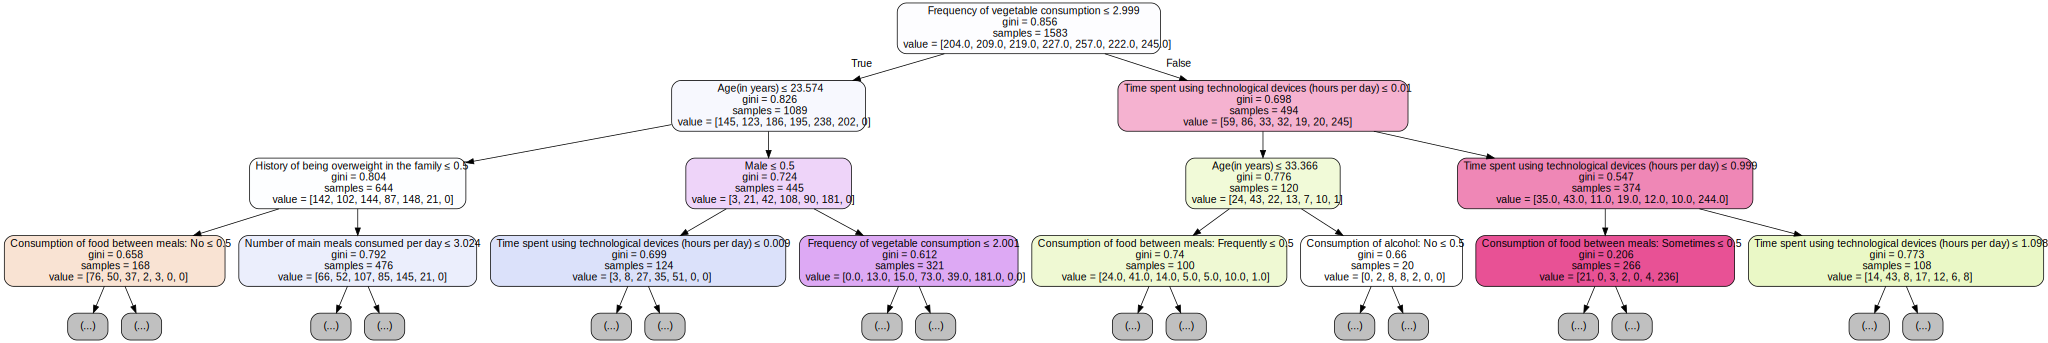

In [28]:
feature_names = []
for c in X_train.columns:
    feature_names.append(attribute_lookup[c])
dot_data_partial = export_graphviz(decision_tree,
                                   out_file=None,
                                   feature_names=feature_names,
                                   # class_names=[str(c) for c in decision_tree.classes_], # Use string representation of class names
                                   filled=True, rounded=True,
                                   special_characters=True,
                                   max_depth=3)

graph_partial = graphviz.Source(dot_data_partial, format='pdf')
# graph_partial.render("decision_tree_depth_3", format='pdf', cleanup=True)


graph_partial

Random Forest Accuracy: 0.8371

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        68
           1       0.63      0.73      0.68        78
           2       0.77      0.70      0.74        71
           3       0.85      0.71      0.78        63
           4       0.89      0.84      0.86        94
           5       0.84      0.96      0.89        75
           6       1.00      0.99      0.99        79

    accuracy                           0.84       528
   macro avg       0.84      0.83      0.83       528
weighted avg       0.84      0.84      0.84       528


Random Forest Confusion Matrix:
[[61  5  2  0  0  0  0]
 [ 4 57  8  3  4  2  0]
 [ 1 13 50  2  3  2  0]
 [ 1  5  4 45  3  5  0]
 [ 0  6  1  3 79  5  0]
 [ 0  3  0  0  0 72  0]
 [ 0  1  0  0  0  0 78]]


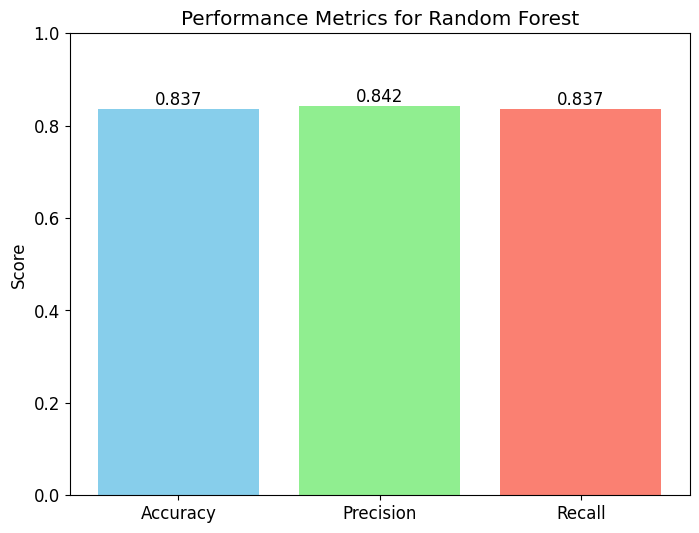

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

print('\nRandom Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

precision_rf = report_rf['weighted avg']['precision']
recall_rf = report_rf['weighted avg']['recall']

metrics_rf = ['Accuracy', 'Precision', 'Recall']
values_rf = [accuracy_rf, precision_rf, recall_rf]

plt.figure(figsize=(8, 6))
bars_rf = plt.bar(metrics_rf, values_rf, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Score')
plt.title('Performance Metrics for Random Forest')
plt.ylim(0, 1)

for bar in bars_rf:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')

plt.show()


In [30]:
importances = random_forest.feature_importances_
feature_names = X_train.columns
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

feature_importances_df['feature_display'] = feature_importances_df['feature'].map(attribute_lookup).fillna(feature_importances_df['feature'])

feature_importances_df.head(10)

,feature,importance,feature_display
0,Age,0.157042,Age(in years)
3,FCVC,0.136644,Frequency of vegetable consumption
9,TUE,0.092022,Time spent using technological devices (hours ...
4,NCP,0.091472,Number of main meals consumed per day
6,CH2O,0.086973,Daily water intake
8,FAF,0.086613,Physical activity frequency (hours per week)
1,FHOO,0.049117,History of being overweight in the family
10,Gender_Female,0.039791,Female
18,CALC_Sometimes,0.034070,Consumption of alcohol: Sometimes
11,Gender_Male,0.032478,Male


In [31]:
plt.rcParams['font.size'] = 14

/tmp/ipython-input-32-1970912469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature_display', data=feature_importances_df.head(10), palette='viridis')


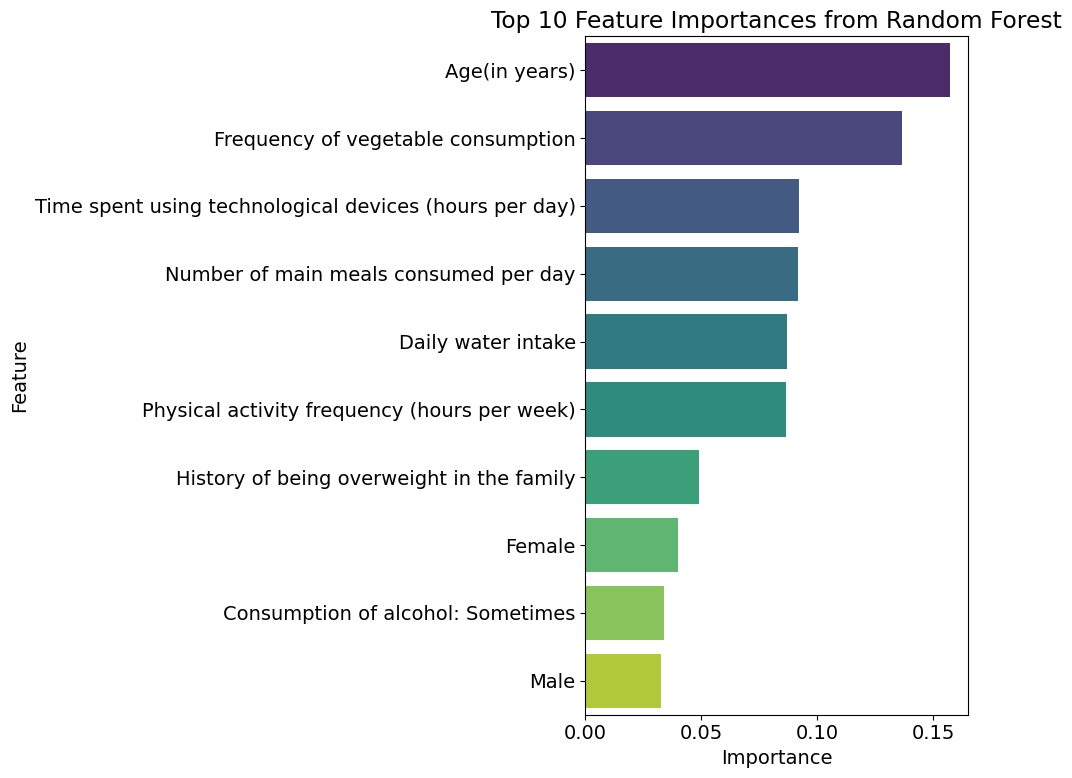

In [32]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature_display', data=feature_importances_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [33]:
plt.rcParams['font.size'] = 12

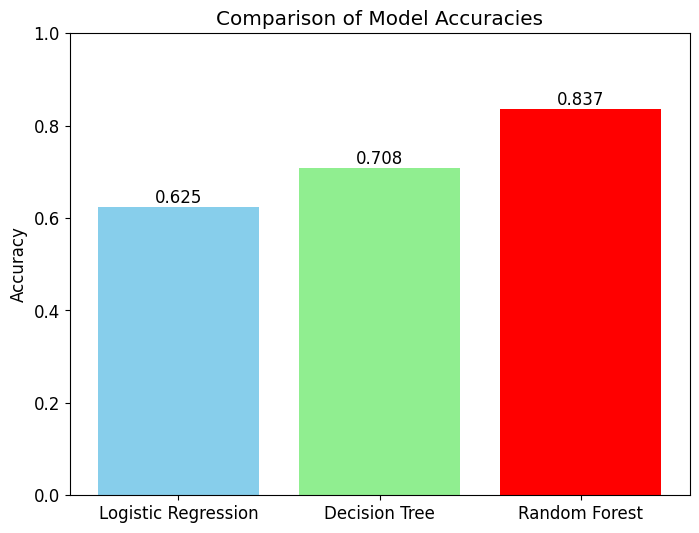

In [34]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')

plt.show()

In [35]:
attribute_lookup

{'Gender_Female': 'Female',
 'Gender_Male': 'Male',
 'Age': 'Age(in years)',
 'Height': 'Height (in meters)',
 'Weight': 'Weight (in kilograms)',
 'FHOO': 'History of being overweight in the family',
 'FAVC': 'Frequent consumption of high-calorie foods',
 'FCVC': 'Frequency of vegetable consumption',
 'NCP': 'Number of main meals consumed per day',
 'CAEC_Always': 'Consumption of food between meals: Always',
 'CAEC_Frequently': 'Consumption of food between meals: Frequently',
 'CAEC_Sometimes': 'Consumption of food between meals: Sometimes',
 'CAEC_no': 'Consumption of food between meals: No',
 'SMOKE': 'Smoking habit (yes/no)',
 'CH2O': 'Daily water intake',
 'SCC': 'Calories consumption monitoring (yes/no)',
 'FAF': 'Physical activity frequency (hours per week)',
 'TUE': 'Time spent using technological devices (hours per day)',
 'CALC_Always': 'Consumption of alcohol: Always',
 'CALC_Frequently': 'Consumption of alcohol: Frequently',
 'CALC_Sometimes': 'Consumption of alcohol: Someti